In [ ]:
%matplotlib inline


# Local Binary Pattern for texture classification

In this example, we will see how to classify textures based on LBP (Local
Binary Pattern). LBP looks at points surrounding a central point and tests
whether the surrounding points are greater than or less than the central point
(i.e. gives a binary result).




The histogram of the LBP result is a good measure to classify textures.
Here, we test the histogram distributions against each other using the
Kullback-Leibler-Divergence.



In [ ]:
import requests
import cv2 
"""Download da imagem de teste"""
img_data = requests.get('https://data2.polantis.com/image1000/data/699/24612/Brick%20Texture%2081_3D_p.png').content

with open('parede.jpg', 'wb') as handler:
    handler.write(img_data)

(512, 512)
Rotated images matched against references using LBP:
original: brick, rotated: 30deg, match result:  brick
original: grass, rotated: 70deg, match result:  grass
original: brick, rotated: 145deg, match result:  grass


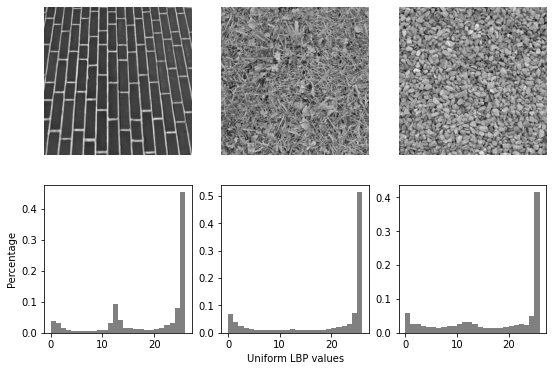

In [ ]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import numpy as np
import matplotlib.pyplot as plt


# settings for LBP
radius = 3
n_points = 8 * radius

def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')

def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = local_binary_pattern(img, n_points, radius,  method="uniform")
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, density=True, bins=n_bins,
                                   range=(0, n_bins))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name


brick = data.brick()
grass = data.grass()
gravel = data.gravel()

print(brick.shape)
img_test = cv2.imread('parede.jpg',0)
img_test = cv2.resize(img_test,brick.shape)


refs = {
    'brick': local_binary_pattern(brick, n_points, radius, method="uniform"),
    'grass': local_binary_pattern(grass, n_points, radius, method="uniform"),
    'gravel': local_binary_pattern(gravel, n_points, radius, method="uniform")
}

# classify rotated textures
print('Rotated images matched against references using LBP:')
print('original: brick, rotated: 30deg, match result: ',
      match(refs, rotate(brick, angle=30, resize=False)))
print('original: grass, rotated: 70deg, match result: ',
      match(refs, rotate(grass, angle=70, resize=False)))
# print('original: gravel, rotated: 145deg, match result: ',
#       match(refs, rotate(gravel, angle=145, resize=False)))

print('original: brick, rotated: 145deg, match result: ',
      match(refs, rotate(img_test, angle=90, resize=False)))

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
hist(ax4, refs['brick'])
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
hist(ax5, refs['grass'])
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(gravel)
ax3.axis('off')
hist(ax6, refs['gravel'])

plt.show()